### Content

- [Problem Identification](#ProblemID)
- [Obtain and Familiarize Dataset](#obtaind)
- [Explore the Characters in Data](#EDC)
- [Explore the Price in Data](#EDP)
- [Assess the Distributions](#AD)
- [Explore the Terrain in Data](#ETD)
- [Explore the Snow Making and fastEight in Data](#ESMD)
- [Derive State-wide Summary Statistics For Our Market Segment](#DSWSSFOMS)
- [Review the Distributions](#RD)
- [Population Data](#PD)
- [Target Feature](#TF)
- [Number Of Missing Values By Row - Resort](#NMVBRR)
- [Save the Data](#SD)
- [Summarize the Assessment](#SA)

### Problem Identification:<a id='ProblemID'></a>

Given that the operating costs increase by 1.5M dollars this season, what is a kind of strategy that the Big Mountain Resort can use to maximize profit without lowering the price of premium and with cost cuts before the upcoming season?

**Criteria for success**

The relevant metrics for success are:

- At least one recommended strategy that can cut off the costs without lowering the ticket price is able to be identified `without negative effect on the utility of consumers`.

- The stakeholders’ decision-making is based on my proposal and this proposal should be implemented before the upcoming season.


**Constraints**

- The significant constraint is their unwillingness to lower the price of premium since this strategy is considered as a serious impediment to their investment strategy.

- The suspicion that  their capitalization on its facilities is not at maximum may possibly become a constraint to certain proposals from being effective.

**Scope of Solution Space**

The data analysis is to focus on Big Mountain Resort located in Montana including Glacier National Park and Flathead National Forest regions. This analysis is to find the strategy without lowering a premium of ticket and negatively effect on consumers. The additional investigation is to determine what prevents them from maximizing their capitalization on facilities.

### Obtain and Familiarize Dataset<a id='obtaind'></a>

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os
import io
import requests

In [2]:
# Get data url and download into pandas DataFrame
url = 'https://raw.githubusercontent.com/springboard-curriculum/DataScienceGuidedCapstone/0bfc227a9e6fa4a2b0b0ed786c4186bcb39cbc1d/raw_data/ski_resort_data.csv'
request=requests.get(url).content
ski_data =pd.read_csv(io.StringIO(request.decode('utf-8')))

In [3]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

There are several relevant variables that can help build the causal analysis in order to understand the nature of price and quantity. `AdultWeekday` and `Adult Weekend` can turn into dummy variables. The simultaneity model needs additional tools to test as well.

In [4]:
display(ski_data.head())

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


### Explore the Characters in Data<a id='EDC'></a>

In [5]:
# Assess the Big Mountain Resort
display(ski_data[ski_data.Name == 'Big Mountain Resort'].T)

,151
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastEight,0
fastSixes,0
fastQuads,3


Note: See the current `total_chairs`. The new chair lift installed in this resort.

In [6]:
# Find all list of missings
missing = pd.concat([ski_data.isnull().sum(), 100 * ski_data.isnull().mean()], axis=1).rename(columns={0:'Count',1:'%'})
pd.options.display.float_format = '{:.2f}'.format
display(missing[(missing['Count'] > 0)].sort_values('Count', ascending = False))

,Count,%
fastEight,166,50.30
NightSkiing_ac,143,43.33
AdultWeekday,54,16.36
TerrainParks,51,15.45
daysOpenLastYear,51,15.45
AdultWeekend,51,15.45
projectedDaysOpen,47,14.24
Snow Making_ac,46,13.94
averageSnowfall,14,4.24
LongestRun_mi,5,1.52


The `fastEight` has highest number of missing values, which is a bit more than an half of the entire rows. Surprisingly, the 16% and 15% of `AdultWeekDay` and `AdultWeekend`, respectively, in the dataset contain missing values. The interesting fact is that the isnull() function does not only determine if value is missing based on *NULL* but also -1 and 999. 

In [7]:
# Select all variables that contain character
display(ski_data.select_dtypes('object'))

,Name,Region,state
0,Alyeska Resort,Alaska,Alaska
1,Eaglecrest Ski Area,Alaska,Alaska
2,Hilltop Ski Area,Alaska,Alaska
3,Arizona Snowbowl,Arizona,Arizona
4,Sunrise Park Resort,Arizona,Arizona
...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,Wyoming
326,Sleeping Giant Ski Resort,Wyoming,Wyoming
327,Snow King Resort,Wyoming,Wyoming
328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming


In [8]:
# List of name duplicates
display(ski_data.groupby('Name')['Name'].agg('count')[ski_data.groupby('Name')['Name'].agg('count') > 1])

Name
Crystal Mountain    2
Name: Name, dtype: int64

In [9]:
# Is this resort duplicated if taking into account Region and/or state as well?

Name = pd.DataFrame(ski_data.groupby('Name')['Name'].agg('count')[
    ski_data.groupby('Name')['Name'].agg('count') > 1]).rename(
    columns={'Name':'Duplicates'}).sort_values('Duplicates',
    ascending=False).reset_index()

State = pd.DataFrame(ski_data.groupby('state')['state'].agg('count')[
    ski_data.groupby('state')['state'].agg('count') > 1]).rename(
    columns={'state':'Duplicates'}).sort_values('Duplicates',
    ascending=False).reset_index()

Region = pd.DataFrame(ski_data.groupby('Region')['Region'].agg('count')[
    ski_data.groupby('Region')['Region'].agg('count') > 1]).rename(
    columns={'Region':'Duplicates'}).sort_values('Duplicates',
    ascending=False).reset_index()

In [10]:
display(Name)

,Name,Duplicates
0,Crystal Mountain,2


The name `Crystal Mountain` has two duplicates in this data.

In [11]:
display(Region.merge(State, how='inner', left_on = 'Region', right_on = 'state'))

,Region,Duplicates_x,state,Duplicates_y
0,New York,33,New York,33
1,Michigan,29,Michigan,29
2,Colorado,22,Colorado,22
3,Pennsylvania,19,Pennsylvania,19
4,Wisconsin,16,Wisconsin,16
5,New Hampshire,16,New Hampshire,16
6,Vermont,15,Vermont,15
7,Minnesota,14,Minnesota,14
8,Montana,12,Montana,12
9,Idaho,12,Idaho,12


The table shows the duplicates for each regon and every state.

In [12]:
display(ski_data[ski_data['Name'] == 'Crystal Mountain'][['Name','Region','state']])

,Name,Region,state
104,Crystal Mountain,Michigan,Michigan
295,Crystal Mountain,Washington,Washington


The duplicates of `Crystal Mountain` have two very different states and regions.

In [13]:
# Are all regions and states the same?
display(ski_data[ski_data.Region != ski_data.state][[
    'Region','state']].groupby('state')[
    'Region'].value_counts())

state       Region             
California  Sierra Nevada          20
            Northern California     1
Nevada      Sierra Nevada           2
Oregon      Mt. Hood                4
Utah        Salt Lake City          6
Name: Region, dtype: int64

No, the vast majority of the differences are in California, with most Regions being called Sierra Nevada and just one referred to as Northern California.

In [14]:
# List of counting uniques for each state and every region
display(ski_data[['Region', 'state']].nunique())

Region    38
state     35
dtype: int64

There are more unique regions than states, which make sense.

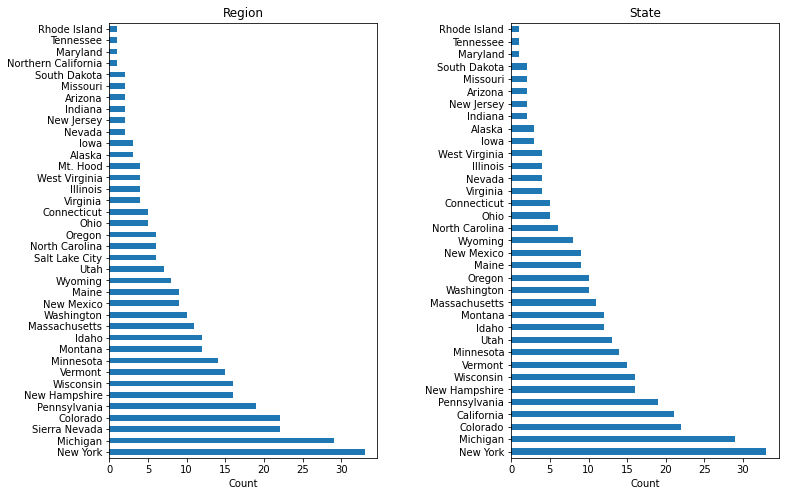

In [15]:
#Create two horizontal bar charts

fig, ax = plt.subplots(1,2, figsize=(12,8))                         # Create one row and two columns of plots
ski_data.Region.value_counts().plot(kind='barh', ax=ax[0])          # Count duplicates in region variable in plot
ax[0].set_title('Region')
ax[0].set_xlabel('Count')

ski_data.state.value_counts().plot(kind='barh', ax=ax[1])           # Count duplicates in state variable in plot
ax[1].set_title('State')
ax[1].set_xlabel('Count')

plt.subplots_adjust(wspace=0.5);                                    # Give the breathing room for both plots
plt.show()

As indicated by above, Montana is being counted 13 times, implying that Big Mountain Resort has its competitors and it is likely to be in range between monopolistic and perfect competitions.

### Explore the Price in Data<a id='EDP'></a>

In [16]:
# Find the average price for each state
state_price_means = ski_data.groupby('state')[['AdultWeekday','AdultWeekend']].mean()
display(state_price_means.head())

,AdultWeekday,AdultWeekend
state,,
Alaska,47.33,57.33
Arizona,81.50,83.50
California,78.21,81.42
Colorado,90.71,90.71
Connecticut,47.80,56.80


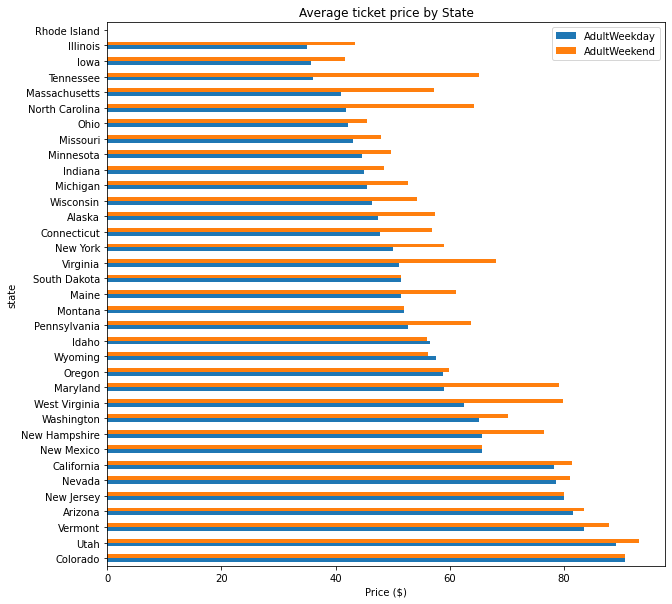

In [17]:
# Create the bar chart
state_price_means.sort_values(['AdultWeekday','AdultWeekend'],
    ascending=False).plot(kind='barh', 
                          figsize=(10, 10), 
                          title='Average ticket price by State')
plt.xlabel('Price ($)')
plt.show()

As indicated by above, the price of premium on weekend is higher than that on weekday. However, strangely, the Rhode Island has no price on premium.

In [18]:
# Melt dataset focusing on state, price, and type of tickets
ticket_prices = pd.melt(ski_data[['state', 'AdultWeekday', 'AdultWeekend']], 
                        id_vars= 'state', 
                        var_name= 'Ticket', 
                        value_vars=['AdultWeekday', 'AdultWeekend'], 
                        value_name='Price')

threshold = ticket_prices['Price'].agg('median')

In [19]:
display(ticket_prices.head())

,state,Ticket,Price
0,Alaska,AdultWeekday,65.00
1,Alaska,AdultWeekday,47.00
2,Alaska,AdultWeekday,30.00
3,Arizona,AdultWeekday,89.00
4,Arizona,AdultWeekday,74.00


This is now in a format we can pass to [seaborn](https://seaborn.pydata.org/)'s [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function to create boxplots of the ticket price distributions for each ticket type for each state.

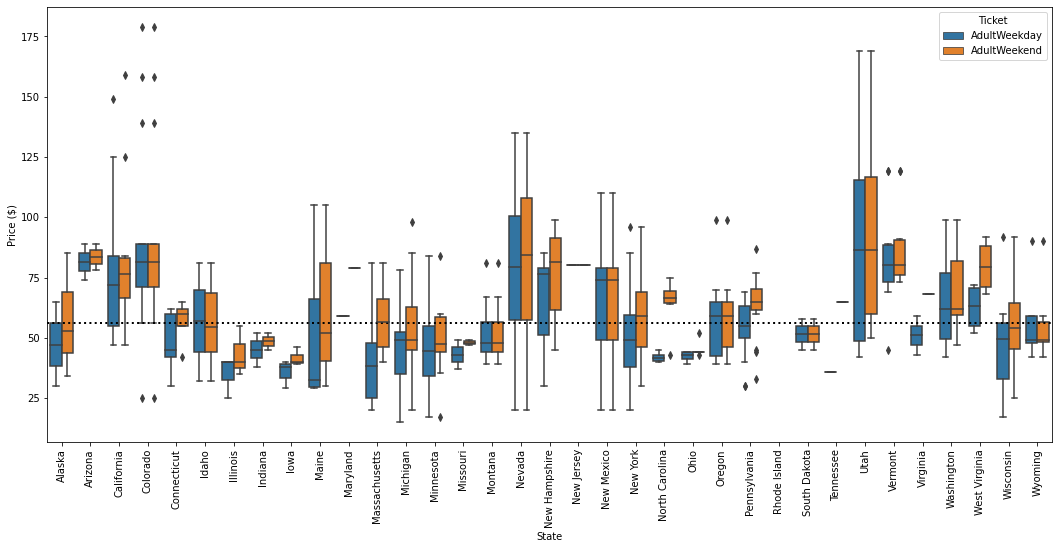

In [20]:
#Create a seaborn boxplot of the ticket price
plt.subplots(figsize=(18, 8))
sns.boxplot(x='state', y='Price', hue='Ticket', data=ticket_prices)
plt.xticks(rotation='vertical')
plt.axhline(y=threshold,linewidth=2, color='black',linestyle=':')
plt.ylabel('Price ($)')
plt.xlabel('State');

The market segment in Montana shows the same variance of ticket price for both `AdultWeekday` and `AdultWeekend`. The median of all ticket prices for all states approximately equals 75% quantile of both `AdultWeekday` and `AdultWeekend` ticket prices for Montana.  

In [21]:
# Create the statistic description
display(ski_data.describe()[['AdultWeekday','AdultWeekend']].T)

,count,mean,std,min,25%,50%,75%,max
AdultWeekday,276.00,57.92,26.14,15.00,40.00,50.00,71.00,179.00
AdultWeekend,279.00,64.17,24.55,17.00,47.00,60.00,77.50,179.00


In [22]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
perc_missing_price = pd.DataFrame(missing_price.value_counts()/len(
    missing_price)).rename(columns={0:'% of missing price'})
pd.options.display.float_format = '{:.2%}'.format

display(perc_missing_price)

,% of missing price
0,82.42%
2,14.24%
1,3.33%


There are over 82% of no missing ticket prices, over 14% of missing prices for both `AdultWeekday` and `AdultWeekend`, and over 3% of missing prices for either `AdultWeekday` or `AdultWeekend`.

### Assess the Distributions<a id='AD'></a>

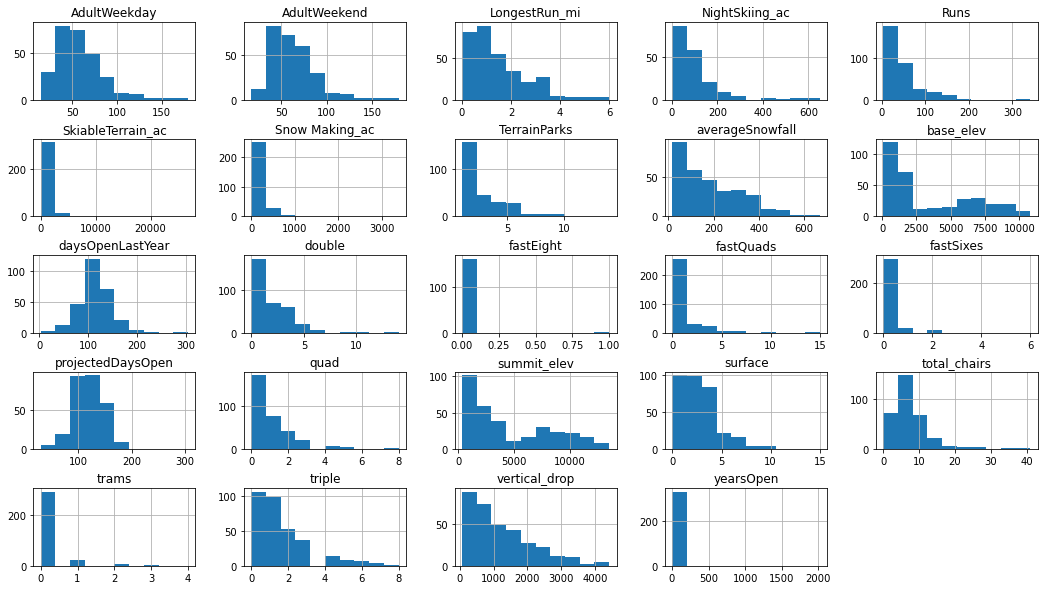

In [23]:
# Create the histograms for each numeric variables
ski_data.hist(figsize=(18,10))
plt.subplots_adjust(hspace=0.5)
plt.show()

What features do we have possible cause for concern about and why?

* SkiableTerrain_ac because values are clustered down the low end,
* Snow Making_ac for the same reason,
* fastEight because all but one value is 0 so it has very little variance, and half the values are missing,
* fastSixes raises an amber flag; it has more variability, but still mostly 0,
* trams also may get an amber flag for the same reason,
* yearsOpen because most values are low but it has a maximum of 2019, which strongly suggests someone recorded calendar year rather than number of years.

### Explore the Terrain on Data<a id='ETD'></a>

In [24]:
#Filter the 'SkiableTerrain_ac' column to print the values greater than 10000
pd.options.display.float_format = '{:.2f}'.format
print(ski_data.SkiableTerrain_ac[ski_data.SkiableTerrain_ac > 10000])

39   26819.00
Name: SkiableTerrain_ac, dtype: float64


In [25]:
# One resort has an incredibly large skiable terrain area! Which is it?
ski_data[ski_data.SkiableTerrain_ac > 10000].T

,39
Name,Silverton Mountain
Region,Colorado
state,Colorado
summit_elev,13487
vertical_drop,3087
base_elev,10400
trams,0
fastEight,0.00
fastSixes,0
fastQuads,0


The largest skiable terrain is in Colorado state and the resort is called Silverton Mountain. The summit elevator is 13,487 feet and the base elevator is 10,400 feet with vertical drop equal to 3,087 feet. However, the skiable terrain equals 26,819 feet, which equals 5.08 miles. This value is nonsensical.

In [26]:
print(ski_data.loc[39, 'SkiableTerrain_ac'])

26819.0


In [27]:
# Replace 26,819 feet with 1819 
ski_data.loc[39, 'SkiableTerrain_ac'] = 1819

In [28]:
print(ski_data.loc[39, 'SkiableTerrain_ac'])

1819.0


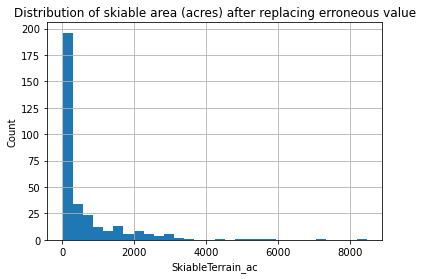

In [29]:
ski_data.SkiableTerrain_ac.hist(bins=30)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('Count')
plt.title('Distribution of skiable area (acres) after replacing erroneous value');

You now see a rather long tailed distribution. You may wonder about the now most extreme value that is above 8000, but similarly you may also wonder about the value around 7000. If you wanted to spend more time manually checking values you could, but leave this for now. The above distribution is plausible.

### Explore the Snow Making and  fastEight in Data<a id='ESMD'></a>

In [30]:
print(ski_data['Snow Making_ac'][ski_data['Snow Making_ac'] > 1000])

11   3379.00
18   1500.00
Name: Snow Making_ac, dtype: float64


In [31]:
display(ski_data[ski_data['Snow Making_ac'] > 3000].T)

,11
Name,Heavenly Mountain Resort
Region,Sierra Nevada
state,California
summit_elev,10067
vertical_drop,3500
base_elev,7170
trams,2
fastEight,0.00
fastSixes,2
fastQuads,7


There is a link to the website for [Heavenly Mountain Resort](https://www.skiheavenly.com/the-mountain/about-the-mountain/mountain-info.aspx). In fact, the snowmaking covers 60% of the trails.

In [32]:
print('The snowmaking_ac roughly equals '+str(.6 * 4800)+' but there is no ticket pricing information for this resort, so this row is dropped.')

The snowmaking_ac roughly equals 2880.0 but there is no ticket pricing information for this resort, so this row is dropped.


In [33]:
display(ski_data.fastEight.value_counts())

0.00    163
1.00      1
Name: fastEight, dtype: int64

Drop the fastEight column in its entirety; half the values are missing and all but the others are the value zero. There is essentially no information in this column.

In [34]:
# Drop the fastEight column from ski_data
ski_data.drop(columns='fastEight', inplace=True)

In [35]:
# What about yearsOpen? How many resorts have purportedly been open for more than 100 years?
print(ski_data.yearsOpen[ski_data.yearsOpen > 100])

34     104.00
115   2019.00
Name: yearsOpen, dtype: float64


One opens for 104 years, which makes sense but another one opens for 2019, the way older than United States itself. This is wrong.

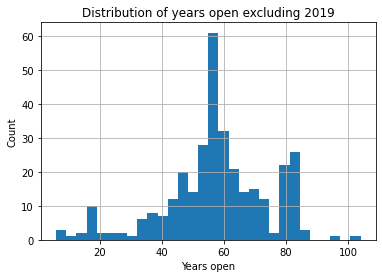

In [36]:
# Create the histogram excluding from 2019 years opening
ski_data.yearsOpen[ski_data.yearsOpen < 2019].hist(bins=30)
plt.xlabel('Years open')
plt.ylabel('Count')
plt.title('Distribution of years open excluding 2019');
plt.show()

In [37]:
# Create statistical description excluding from 2019 years opening.
print(ski_data.yearsOpen[ski_data.yearsOpen < 1000].describe())

count   328.00
mean     57.70
std      16.84
min       6.00
25%      50.00
50%      58.00
75%      68.25
max     104.00
Name: yearsOpen, dtype: float64


In [38]:
# Remove the entire row that contains 2019 years opening.
ski_data = ski_data[ski_data.yearsOpen < 1000]

### Derive State-wide Summary Statistics For Our Market Segment<a id='DSWSSFOMS'></a>

In [39]:
# Create the state summary with number of regions, size of terrains, etc.
state_summary = ski_data.groupby('state').agg(
    resorts_per_state=pd.NamedAgg(column='Name', aggfunc='size'),
    state_total_skiable_area_ac=pd.NamedAgg(column='SkiableTerrain_ac', aggfunc='sum'),
    state_total_days_open=pd.NamedAgg(column='daysOpenLastYear', aggfunc='sum'),
    state_total_terrain_parks=pd.NamedAgg(column='TerrainParks', aggfunc='sum'),
    state_total_nightskiing_ac=pd.NamedAgg(column='NightSkiing_ac', aggfunc='sum')
).reset_index()

display(state_summary.head())

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac
0,Alaska,3,2280.00,345.00,4.00,580.00
1,Arizona,2,1577.00,237.00,6.00,80.00
2,California,21,25948.00,2738.00,81.00,587.00
3,Colorado,22,43682.00,3258.00,74.00,428.00
4,Connecticut,5,358.00,353.00,10.00,256.00


In [40]:
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
print(missing_price.value_counts()/len(missing_price))

0   0.82
2   0.14
1   0.03
dtype: float64


14% of prices for both types of tickets are missing, so all rows with missing prices for both types need to be dropped.

In [41]:
# Using missing_price to remove price missings for both types of tickets only
ski_data = ski_data[missing_price != 2]

### Review Distributions<a id='RD'></a>

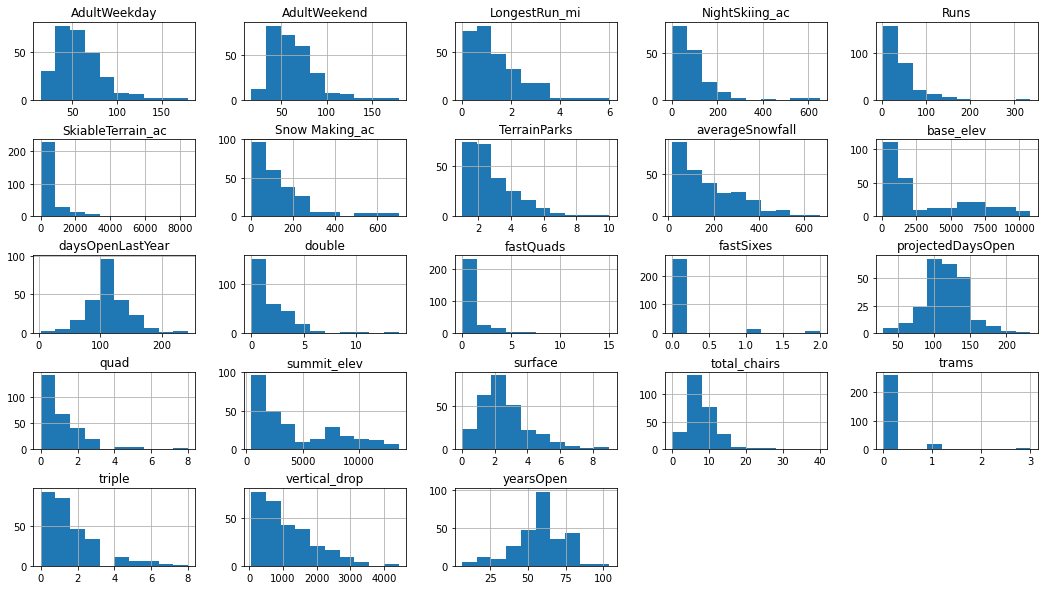

In [42]:
ski_data.hist(figsize=(18, 10))
plt.subplots_adjust(hspace=0.5);

Given that the data is cleaner, the skewness of distribtuion becomes closer to 0 than before since some extrema remove. 

### Population Data<a id='PD'></a>

Population and area data for the US states can be obtained from [wikipedia](https://simple.wikipedia.org/wiki/List_of_U.S._states). Listen, you should have a healthy concern about using data you "found on the Internet". Make sure it comes from a reputable source. This table of data is useful because it allows you to easily pull and incorporate an external data set. It also allows you to proceed with an analysis that includes state sizes and populations for your 'first cut' model. Be explicit about your source (we documented it here in this workflow) and ensure it is open to inspection. All steps are subject to review, and it may be that a client has a specific source of data they trust that you should use to rerun the analysis.

In [43]:
# The data obtained wikipedia produced in November 2020.
states_url = 'https://simple.wikipedia.org/w/index.php?title=List_of_U.S._states&oldid=7168473'
usa_states = pd.read_html(states_url)

In [44]:
print(type(usa_states))

<class 'list'>


In [45]:
print(len(usa_states))

1


In [46]:
usa_states = usa_states[0]
display(usa_states.head())

Name &postal abbs. [1]                                Cities               \
  Name &postal abbs. [1] Name &postal abbs. [1].1      Capital   Largest[5]   
0                Alabama                       AL   Montgomery   Birmingham   
1                 Alaska                       AK       Juneau    Anchorage   
2                Arizona                       AZ      Phoenix      Phoenix   
3               Arkansas                       AR  Little Rock  Little Rock   
4             California                       CA   Sacramento  Los Angeles   

  Established[A] Population[B][3] Total area[4]          Land area[4]  \
  Established[A] Population[B][3]           mi2      km2          mi2   
0   Dec 14, 1819          4903185         52420   135767        50645   
1    Jan 3, 1959           731545        665384  1723337       570641   
2   Feb 14, 1912          7278717        113990   295234       113594   
3   Jun 15, 1836          3017804         53179   137732        52035   
4    Sep 9, 1850         39512223        163695   423967       155779   

           Water area[4]         Numberof Reps.  
       km2           mi2     km2 Numberof Reps.  
0   131171          1775    4597              7  
1  1477953         94743  245384              1  
2   294207           396    1026              9  
3   134771          1143    2961              4  
4   403466          7916   20501             53

In [47]:
# Select the fifth column called Established
established = usa_states.iloc[:, 4]

In [48]:
print(established)

0     Dec 14, 1819
1      Jan 3, 1959
2     Feb 14, 1912
3     Jun 15, 1836
4      Sep 9, 1850
5      Aug 1, 1876
6      Jan 9, 1788
7      Dec 7, 1787
8      Mar 3, 1845
9      Jan 2, 1788
10    Aug 21, 1959
11     Jul 3, 1890
12     Dec 3, 1818
13    Dec 11, 1816
14    Dec 28, 1846
15    Jan 29, 1861
16     Jun 1, 1792
17    Apr 30, 1812
18    Mar 15, 1820
19    Apr 28, 1788
20     Feb 6, 1788
21    Jan 26, 1837
22    May 11, 1858
23    Dec 10, 1817
24    Aug 10, 1821
25     Nov 8, 1889
26     Mar 1, 1867
27    Oct 31, 1864
28    Jun 21, 1788
29    Dec 18, 1787
30     Jan 6, 1912
31    Jul 26, 1788
32    Nov 21, 1789
33     Nov 2, 1889
34     Mar 1, 1803
35    Nov 16, 1907
36    Feb 14, 1859
37    Dec 12, 1787
38    May 29, 1790
39    May 23, 1788
40     Nov 2, 1889
41     Jun 1, 1796
42    Dec 29, 1845
43     Jan 4, 1896
44     Mar 4, 1791
45    Jun 25, 1788
46    Nov 11, 1889
47    Jun 20, 1863
48    May 29, 1848
49    Jul 10, 1890
Name: (Established[A], Established[A]), dtype: obj

Extract the state name, population, and total area (square miles) columns.

In [49]:
# Extract columns 0, 5, and 6 and rename them
usa_states_sub = usa_states.iloc[:, [0,5,6]].copy()
usa_states_sub.columns = ['state', 'state_population', 'state_area_sq_miles']
display(usa_states_sub.head())

,state,state_population,state_area_sq_miles
0,Alabama,4903185,52420
1,Alaska,731545,665384
2,Arizona,7278717,113990
3,Arkansas,3017804,53179
4,California,39512223,163695


In [50]:
# Do I have all the ski data states accounted for?

missing_states = set(state_summary.state) - set(usa_states_sub.state)
print(missing_states)

{'Massachusetts', 'Rhode Island', 'Virginia', 'Pennsylvania'}


No.

In [51]:
print(usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')])

20    Massachusetts[C]
37     Pennsylvania[C]
38     Rhode Island[D]
45         Virginia[C]
47       West Virginia
Name: state, dtype: object


In [52]:
# Remove any values in brackets
usa_states_sub.state.replace(to_replace='\[.*\]', value='', regex=True, inplace=True)
print(usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')])

20    Massachusetts
37     Pennsylvania
38     Rhode Island
45         Virginia
47    West Virginia
Name: state, dtype: object


In [53]:
# Do I have all the ski data states accounted for?
missing_states = set(state_summary.state) - set(usa_states_sub.state)
print(missing_states)

set()


Yes. This is an empty set.

Better! You have an empty set for missing states now. You can confidently add the population and state area columns to the ski resort data.

In [54]:
# Merge two datasets
state_summary = state_summary.merge(usa_states_sub, how='left', on = 'state')
display(state_summary.head())

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population,state_area_sq_miles
0,Alaska,3,2280.00,345.00,4.00,580.00,731545,665384
1,Arizona,2,1577.00,237.00,6.00,80.00,7278717,113990
2,California,21,25948.00,2738.00,81.00,587.00,39512223,163695
3,Colorado,22,43682.00,3258.00,74.00,428.00,5758736,104094
4,Connecticut,5,358.00,353.00,10.00,256.00,3565278,5543


### Target Feature<a id='TF'></a>

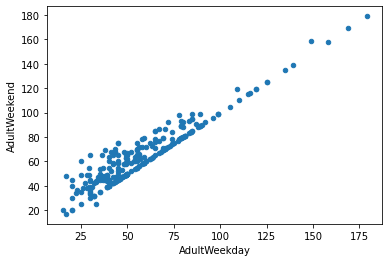

In [55]:
# Understand the relationship between AdultWeekend and AdultWeekday
ski_data.plot(x='AdultWeekday', y='AdultWeekend', kind='scatter');

As indicated by the scattered plot, the `AdultWeekend` and `AdultWeekday` have approximately the same value of price in range of prices and below 100 `AdultWeekday` ticket dollars, the `AdultWeekend` ticket price tends to be higher.

In [56]:
# Focus on Montana state only to confirm if both types of ticket have no price difference.
display(ski_data.loc[ski_data.state == 'Montana',
                     ['AdultWeekend', 'AdultWeekday']])

,AdultWeekend,AdultWeekday
141,42.00,42.00
142,63.00,63.00
143,49.00,49.00
144,48.00,48.00
145,46.00,46.00
146,39.00,39.00
147,50.00,50.00
148,67.00,67.00
149,47.00,47.00
150,39.00,39.00


There is no price difference between two.

In [57]:
display(ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum())

AdultWeekend    4
AdultWeekday    7
dtype: int64

Weekend prices have the least missing values of the two, so drop the weekday prices and then keep just the rows that have weekend price.

In [58]:
ski_data.drop(columns='AdultWeekday', inplace=True)
ski_data.dropna(subset=['AdultWeekend'], inplace=True)

In [59]:
print(ski_data.shape)

(277, 25)


Perform a final quick check on the data.

### Number Of Missing Values By Row - Resort<a id='NMVBRR'></a>

Having dropped rows missing the desired target ticket price, what degree of missingness do you have for the remaining rows?

In [60]:
missing = pd.concat([ski_data.isnull().sum(axis=1), 100 * ski_data.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
display(missing.sort_values(by='count', ascending=False).head(10))

,count,%
329,5,20.00
62,5,20.00
141,5,20.00
86,5,20.00
74,5,20.00
146,5,20.00
184,4,16.00
108,4,16.00
198,4,16.00
39,4,16.00


In [61]:
print(missing['%'].unique())

[ 0.  4.  8. 12. 16. 20.]


Yes, the percentage of missing values per row appear in multiples of 4.

In [62]:
print(missing['%'].value_counts())

0.00     107
4.00      94
8.00      45
12.00     15
16.00     10
20.00      6
Name: %, dtype: int64


This is almost as if values have been removed artificially... Nevertheless, what you don't know is how useful the missing features are in predicting ticket price. You shouldn't just drop rows that are missing several useless features.

In [63]:
print(ski_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non

There are still some missing values, and it's good to be aware of this, but leave them as is for now.

### Save the data<a id='SD'></a>

In [64]:
print(ski_data.shape)

(277, 25)


Save this to your data directory, separately. Note that you were provided with the data in `raw_data` and you should saving derived data in a separate location. This guards against overwriting our original data.

In [65]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='22d92db6-52d9-4e0a-b76b-d41511d24b60', project_access_token='p-b4ca6f29f16193d512d4d8d10d2ac439ed051136')
pc = project.project_context

In [66]:
project.save_data(file_name = "ski_data_cleaned.csv",data = ski_data.to_csv(index=False))

{'file_name': 'ski_data_cleaned.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'springboard-donotdelete-pr-7urz3awjnuzhnt',
 'asset_id': '17999d5e-4327-489f-b50e-67e319a6b998'}

In [67]:
# save the state_summary separately.
project.save_data(file_name = "state_summary.csv",data = state_summary.to_csv(index=False))

{'file_name': 'state_summary.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'springboard-donotdelete-pr-7urz3awjnuzhnt',
 'asset_id': '28106030-cda7-47b5-a3bf-d65c83384559'}

### Summarize the Assessment<a id='SA'></a>

Given that duplicates, depreciations and missing values can be found in `ski_data`, cleaning the dataset is required in order to elevate the data quality. Some suspicious information find in the dataset that requires no action. For example, the dataset contains two duplicated resorts called `Crystal Mountain` that locates in different states. Another example is that regions and states appear to have the same names. Both columns should not be dropped. Based on the data quality assessment, the number of unique regions is greater than the number of unique states. For example, the `Region` may contain Sierra Nevada and Northern California while the `state` only has California. The specific columns need to be dropped, as follow:
- Removed `FastEight`
- Removed `AdultWeekend`

There is a half of `FastEight` rows that contains *0* while another half contains *NULL* so that this column has no value. There are over 14% of ticket prices for both `AdultWeekend` and `AdultWeekday` that are missing and that rows can be removed. However, either tickets still have missing values. When assessing the ticket prices for each resort in Montana, there is no price difference between two types of ticket. Thus, there is no reason to keep both columns. The `AdultWeekend` has the least number of missing values so that the column `AdultWeekday` is dropped. The specific rows are also replaced and removed, as follow:
- Removed `Pine Knob Ski Resort` row
- Removed `AdultWeekday` rows that have pricing information missing
- Replace 26,819 ft by 1,819 for `SkiableTerrain_ac` under the resort called `Silverton Mountain`

The `Pine Knob Ski Resort`'s `yearsOpening` equals *2019*, which does not make sense. With Alesha Eisen's (Database Manager) approval, this row is removed. Not only that, the entire rows that have pricing information missing under `AdultWeekday` are removed. The number of rows are small, which have no effect on price modelling. Also, the `SkiableTerrain_ac` shows a specific row with the resort called `Silverton Mountain` that has `SkiableTerrain_ac` equal to *26,819 ft*. With Database Manager's approval, it replaced with *1,819 ft*. Also, the new dataset that contains a number of population, total area (square miles) is merged with this dataset. Prior to undertaking merging process, the new dataset needed to be repaired by removing brackets in order for consistency. This dataset absorbs the new dataset without loss of information. 